# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Decaluwé Maxime - 50802200

Part. 2: Defrenne Simon - 42242200

Part. 3: Mil-Homens Cavaco Mathieu - 38282200
 
Part. 4: Peiffer Thibaut - 47352200

Part. 5: Roekens Raphaël - 70732200

Part. 6: Starck Robin - 88952200


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


In [26]:
# Imports
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm


## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [27]:
#Load les csv en dataframe
beijing_df = pd.read_csv('BeijingPM.csv')
shanghai_df = pd.read_csv('ShanghaiPM.csv')

#Définir la colonne qu'on analyse
target_column = 'PM_US Post'
year = 'year'

#Filtrer les dataframe de façon à ne garder que les entrées où on a une valeur pour Shanghai et Beijing
valid_beijing = beijing_df[~pd.isna(beijing_df[target_column]) & ~pd.isna(shanghai_df[target_column]) & (beijing_df[year] > 2011) & (beijing_df[year] < 2016)]
valid_shanghai = shanghai_df[~pd.isna(beijing_df[target_column]) & ~pd.isna(shanghai_df[target_column]) & (shanghai_df[year] > 2011) & (shanghai_df[year] < 2016)]

#Filtrer les dataframe "communs" en saison summer et winter
valid_beijing_winter = valid_beijing[valid_beijing["season"] == 4]
valid_shanghai_winter = valid_shanghai[valid_shanghai["season"] == 4]

valid_beijing_summer = valid_beijing[valid_beijing["season"] == 2]
valid_shanghai_summer = valid_shanghai[valid_shanghai["season"] == 2]

b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [28]:
# Code here
# À faire pour les deux en même temps ? (moyenne/variance/mediane globale ?)
be_mean_winter = valid_beijing_winter.loc[:, target_column].mean()
be_mean_summer = valid_beijing_summer.loc[:, target_column].mean()
sh_mean_winter = valid_shanghai_winter.loc[:, target_column].mean()
sh_mean_summer = valid_shanghai_summer.loc[:, target_column].mean()

be_var_winter = valid_beijing_winter.loc[:, target_column].var()
be_var_summer = valid_beijing_summer.loc[:, target_column].var()
sh_var_winter = valid_shanghai_winter.loc[:, target_column].var()
sh_var_summer = valid_shanghai_summer.loc[:, target_column].var()

be_median_winter = valid_beijing_winter.loc[:, target_column].median()
be_median_summer = valid_beijing_summer.loc[:, target_column].median()
sh_median_winter = valid_shanghai_winter.loc[:, target_column].median()
sh_median_summer = valid_shanghai_summer.loc[:, target_column].median()

be_quant25_winter = valid_beijing_winter.loc[:, target_column].quantile(0.25)
be_quant25_summer = valid_beijing_summer.loc[:, target_column].quantile(0.25)
sh_quant25_winter = valid_shanghai_winter.loc[:, target_column].quantile(0.25)
sh_quant25_summer = valid_shanghai_summer.loc[:, target_column].quantile(0.25)

be_quant75_winter = valid_beijing_winter.loc[:, target_column].quantile(0.75)
be_quant75_summer = valid_beijing_summer.loc[:, target_column].quantile(0.75)
sh_quant75_winter = valid_shanghai_winter.loc[:, target_column].quantile(0.75)
sh_quant75_summer = valid_shanghai_summer.loc[:, target_column].quantile(0.75)


print("Beijing winter : Espérance, Déviation std, Variance, q25, q50, q75")
print([be_mean_winter,np.sqrt(be_var_winter),be_var_winter,be_quant25_winter,be_median_winter,be_quant75_winter])

print("Beijing summer : Espérance, Déviation std, Variance, q25, q50, q75")
print([be_mean_summer,np.sqrt(be_var_summer),be_var_summer,be_quant25_summer,be_median_summer,be_quant75_summer])

print("Shanghai winter : Espérance, Déviation std, Variance, q25, q50, q75")
print([sh_mean_winter,np.sqrt(sh_var_winter),sh_var_winter,sh_quant25_winter,sh_median_winter,sh_quant75_winter])

print("Shanghai summer : Espérance, Déviation std, Variance, q25, q50, q75")
print([sh_mean_summer,np.sqrt(sh_var_summer),sh_var_summer,sh_quant25_summer,sh_median_summer,sh_quant75_summer])


Beijing winter : Espérance, Déviation std, Variance, q25, q50, q75
[122.4049257515393, 124.90900715120314, 15602.260067499317, 21.0, 82.0, 180.0]
Beijing summer : Espérance, Déviation std, Variance, q25, q50, q75
[71.84084337349398, 54.5731375968239, 2978.2273471618737, 30.0, 59.0, 100.0]
Shanghai winter : Espérance, Déviation std, Variance, q25, q50, q75
[76.2700712302306, 57.532648617333955, 3310.0056569256185, 36.0, 60.0, 99.0]
Shanghai summer : Espérance, Déviation std, Variance, q25, q50, q75
[33.89180722891566, 24.728151666969172, 611.4814848646303, 16.0, 29.0, 46.0]


### Statistics for Beijing & Shanghai

<table>
    <tr>
        <th rowspan="2">City</th>
        <th rowspan="2">Season</th>
        <th>Mean</th>
        <th>Variance</th>
        <th>25% Quantile</th>
        <th>Median</th>
        <th>75% Quantile</th>
    </tr>
    <tr></tr>
    <tr>
        <td rowspan="2">Beijing</td>
        <td>Winter</td>
        <td><code>122.4049257515393</code></td>
        <td><code>15602.260067499317</code></td>
        <td><code>21.0</code></td>
        <td><code>82.0</code></td>
        <td><code>180.0</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>71.84084337349398</code></td>
        <td><code>2978.2273471618737</code></td>
        <td><code>30.0</code></td>
        <td><code>59.0</code></td>
        <td><code>100.0</code></td>
    </tr>
    <tr>
        <td rowspan="2">Shanghai</td>
        <td>Winter</td>
        <td><code>76.2700712302306</code></td>
        <td><code>3310.0056569256185</code></td>
        <td><code>36.0</code></td>
        <td><code>60.0</code></td>
        <td><code>99.0</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>33.89180722891566</code></td>
        <td><code>611.4814848646303</code></td>
        <td><code>16.0</code></td>
        <td><code>29.0</code></td>
        <td><code>46.0</code></td>
    </tr>
</table>

Comments here:

On average, we notice that Beijing is about twice as polluted as Shanghai. Moreover, the concentration of particulate matter nearly doubles during the winter in both cities.

The high variance of the concentration in winter, especially in Beijing, indicates greater variability during this season. This means that while the average pollution level is higher, there are also significant fluctuations. We also observe a marked increase in variance in Beijing during the winter, suggesting extreme pollution events occur more frequently.

The median shows the central tendency, and in all cases, it is lower than the mean. This can be explained by exceptional events where pollution levels spike, pulling the mean upwards.

=> Explication du pourquoi 

Conclusion?


-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



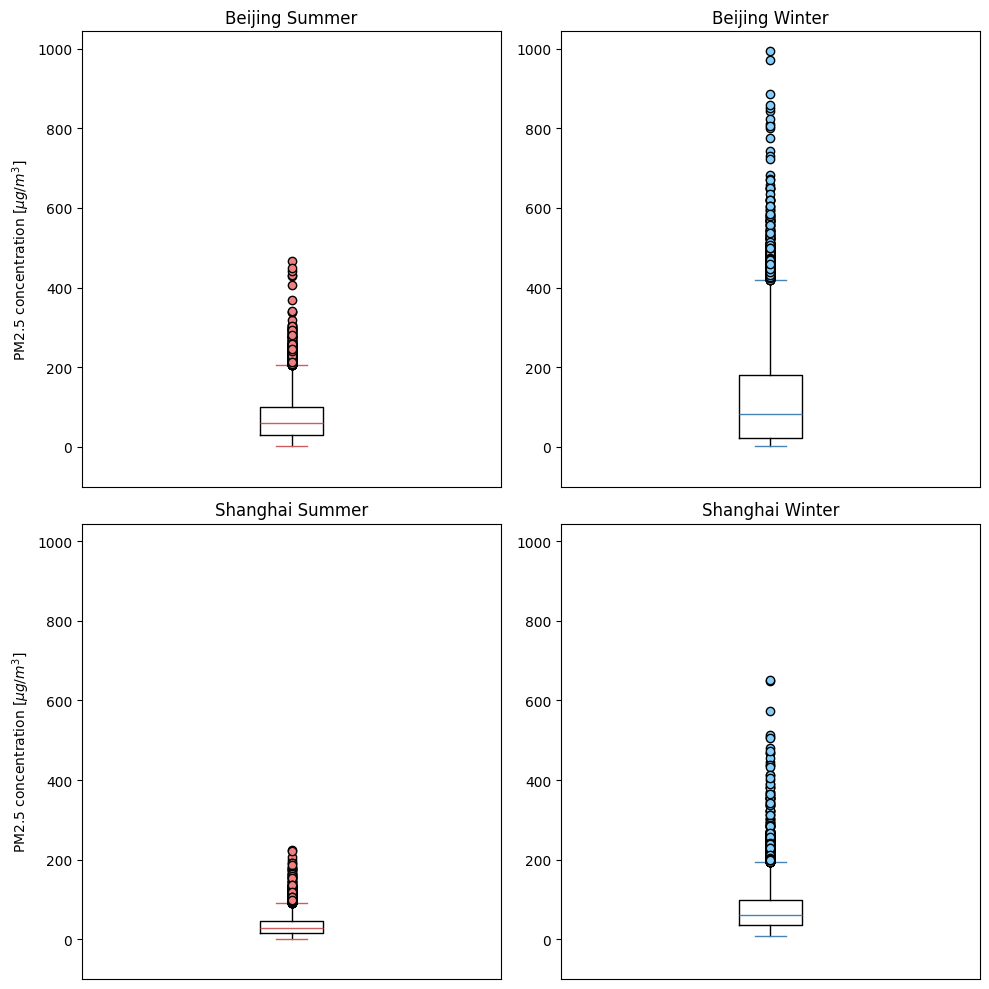

In [29]:
# Beaux plots des PM ?
# 1 box plot par ville et par saison, en prenant toutes les données d'une même saison (graphe = boite à moustache, voir internet)
# Résultats à comparer avec le niveau recommandé sur internet.

data = [
    valid_beijing_summer[target_column].to_numpy(),
    valid_beijing_winter[target_column].to_numpy(),
    valid_shanghai_summer[target_column].to_numpy(),
    valid_shanghai_winter[target_column].to_numpy()
]

# Create a figure with 4 subplots arranged in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Titles for each subplot
titles = [
    'Beijing Summer',
    'Beijing Winter',
    'Shanghai Summer',
    'Shanghai Winter'
]

y_min = -100 #min(np.min(dataset) for dataset in data) - 10
y_max = max(np.max(dataset) for dataset in data) + 50

colors = ['indianred', 'steelblue', 'indianred', 'steelblue']
outliers_colors = ['lightcoral', 'lightskyblue', 'lightcoral', 'lightskyblue']

# Iterate through each dataset and subplot
for i, (ax, dataset, title) in enumerate(zip(axs.flatten(), data, titles)):
    box = ax.boxplot(dataset, 
                     boxprops=dict(color='black'),
                     medianprops=dict(color=colors[i]),  # Color for the median line
                     whiskerprops=dict(color='black'),  # Color for whiskers
                     capprops=dict(color=colors[i]),  # Color for caps
                     flierprops=dict(markerfacecolor=outliers_colors[i], marker='o'))  # Color for outliers
    ax.set_title(title)
    if i % 2 == 0:  # Only set y-labels for left subplots (0 and 2)
        ax.set_ylabel(r'PM2.5 concentration $[µg/m^3]$') 
    ax.set_xticks([])  # Remove x-ticks
    ax.set_ylim(y_min, y_max)  # Set the same y-limits for all subplots

plt.tight_layout()
plt.show()

The boxplot indicates that PM2.5 concentrations are higher in Beijing compared to Shanghai, suggesting poorer air quality in Beijing. During the summer, there are some outliers, but they remain relatively close to the median values. However, in winter, the number of outliers increases significantly, especially in Beijing, with more extreme values. This could be attributed to the use of heating during the colder months, which often involves burning fuels that contribute to higher PM2.5 levels.

The asymmetry of the quartiles clearly stands out, confirmed by the table above. Most of the data is centered around the median, but some extreme outliers greatly influence the mean. The asymmetry of the quartiles led us to fit a Gamma distribution to the dataset.



## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [30]:
#Calcul des paramètres

# définition des listes de datas
US_data_beijing_summer = valid_beijing_summer[target_column].to_numpy()
US_data_beijing_winter = valid_beijing_winter[target_column].to_numpy()
US_data_shangai_summer = valid_shanghai_summer[target_column].to_numpy()
US_data_shangai_winter = valid_shanghai_winter[target_column].to_numpy()

# MLE sur chaque groupe de data
beijing_fit_summer = st.gamma.fit(US_data_beijing_summer, floc=0) 
beijing_fit_winter = st.gamma.fit(US_data_beijing_winter, floc=0)
shangai_fit_summer = st.gamma.fit(US_data_shangai_summer, floc=0)
shangai_fit_winter = st.gamma.fit(US_data_shangai_winter, floc=0)

#Log-Likelihood
log_lklhd_beijing_summer = np.sum(st.gamma.logpdf(US_data_beijing_summer, *beijing_fit_summer))
log_lklhd_beijing_winter = np.sum(st.gamma.logpdf(US_data_beijing_winter, *beijing_fit_winter))
log_lklhd_shangai_summer = np.sum(st.gamma.logpdf(US_data_shangai_summer, *shangai_fit_summer))
log_lklhd_shangai_winter = np.sum(st.gamma.logpdf(US_data_shangai_winter, *shangai_fit_winter))

# Print
# results = [
#     ["Beijing Summer", beijing_fit_summer[0], 1 / beijing_fit_summer[2], log_lklhd_beijing_summer],
#     ["Beijing Winter", beijing_fit_winter[0], 1 / beijing_fit_winter[2], log_lklhd_beijing_winter],
#     ["Shanghai Summer", shangai_fit_summer[0], 1 / shangai_fit_summer[2], log_lklhd_shangai_summer],
#     ["Shanghai Winter", shangai_fit_winter[0], 1 / shangai_fit_winter[2], log_lklhd_shangai_winter],
# ]

# # Conversion en DataFrame avec des colonnes nommées
# columns = ['City/Season', 'Alpha (Shape)', 'Beta (Rate)', 'Log-Likelihood']
# results_df = pd.DataFrame(results, columns=columns)

# # Formatage des résultats à 5 décimales
# results_df['Alpha (Shape)'] = results_df['Alpha (Shape)'].apply(lambda x: f"{x:.5f}")
# results_df['Beta (Rate)'] = results_df['Beta (Rate)'].apply(lambda x: f"{x:.5f}")
# results_df['Log-Likelihood'] = results_df['Log-Likelihood'].apply(lambda x: f"{x:.5f}")

# # Affichage du tableau formaté
# print(results_df)



<style>
    table {
        margin: 0 auto; /* Centre la table horizontalement */
        border-collapse: collapse;
    }
    th, td {
        text-align: center; /* Centre le texte à l'intérieur des cellules */
        padding: 8px;
        border: 1px solid black; /* Optionnel : ajoute une bordure pour une meilleure lisibilité */
    }
</style>

<h3 style="text-align:center;">Gamma parameters and log-likelihood</h3>

<table>
    <tr>
        <th rowspan="2">City</th>
        <th rowspan="2">Season</th>
        <th>MLE α</th>
        <th>MLE β</th>
        <th>L</th>
    </tr>
    <tr></tr>
    <tr>
        <td rowspan="2">Beijing</td>
        <td>Winter</td>
        <td><code>1.70080</code></td>
        <td><code>0.02367</code></td>
        <td><code>-43175.92897</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>0.93987</code></td>
        <td><code>0.00768</code></td>
        <td><code>-48091.58607</code></td>
    </tr>
    <tr>
        <td rowspan="2">Shanghai</td>
        <td>Winter</td>
        <td><code>1.75874</code></td>
        <td><code>0.05189</code></td>
        <td><code>-36870.98934</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>2.25015</code></td>
        <td><code>0.02950</code></td>
        <td><code>-42926.79118</code></td>
    </tr>
</table>

b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

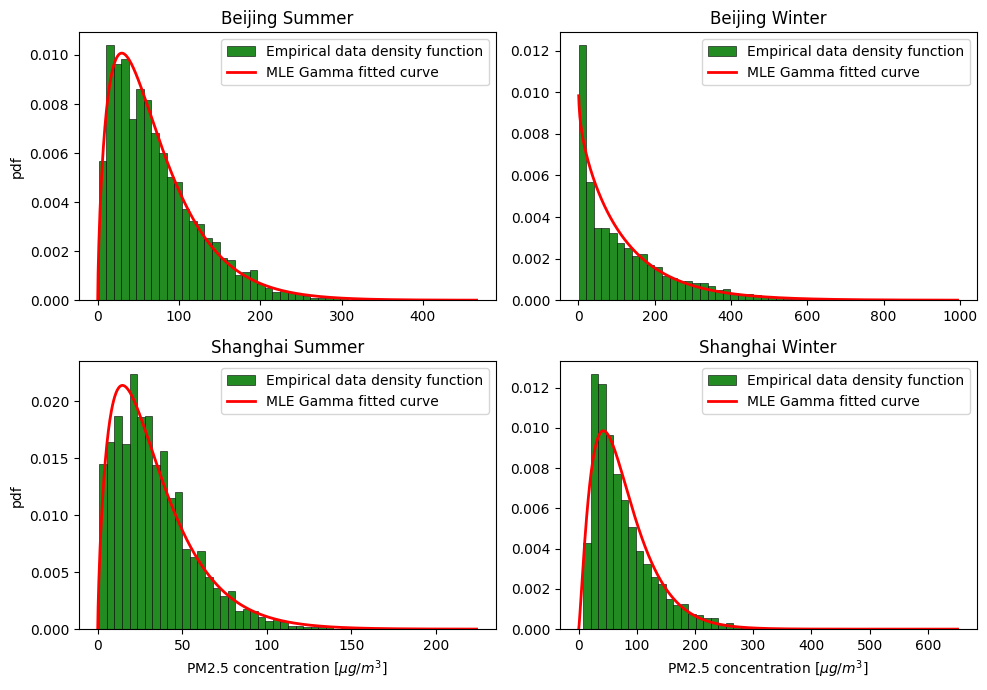

In [58]:
# grouper les datas par classes
data = [US_data_beijing_summer, US_data_beijing_winter, US_data_shangai_summer, US_data_shangai_winter] #Imbriquer les listes
data_gamma = [beijing_fit_summer, beijing_fit_winter, shangai_fit_summer, shangai_fit_winter]
x = [np.linspace(0,max(data[0]),1000),np.linspace(0,max(data[1]),1000),np.linspace(0,max(data[2]),1000),np.linspace(0,max(data[3]),1000)]

n = [50,50,50,50]  #nombre de batonnets (à ajuster)
tittles = ['Beijing Summer','Beijing Winter','Shanghai Summer','Shanghai Winter']
colors = ['forestgreen', 'forestgreen', 'forestgreen', 'forestgreen']
place = [[0,0],[0,1],[1,0],[1,1]]


fig, axs = plt.subplots(2, 2, figsize=(10, 7))


for i in range(4): 

    Curr_Place = place[i][0],place[i][1]
    count, bins, ignored = axs[Curr_Place].hist(data[i], n[i], density=True, color=colors[i], \
                                                             label = 'Empirical data density function',edgecolor='black', linewidth=0.4)
    axs[Curr_Place].plot(x[i], st.gamma.pdf(x[i],*(data_gamma[i])), linewidth=2, color='r', label='MLE Gamma fitted curve')
    axs[Curr_Place].set_title(titles[i])
    
    if i % 2 == 0:
        axs[Curr_Place].set_ylabel(r'pdf')
    if i>1:
        axs[Curr_Place].set_xlabel(r'PM2.5 concentration $[µg/m^3]$')


    axs[Curr_Place].legend()
    

plt.tight_layout()
plt.show()





The histogram of the empirical data closely matches the Gamma distribution fitted using MLE, indicating that the Gamma distribution is a good fit for the data. The MLE parameters accurately capture the shape and skewness, suggesting that the data follows a Gamma-like pattern. Minor deviations in the tails might reflect noise or slight model limitations, but overall, the fit is strong and appropriate for this dataset. We calculated the values of the likelihood of each MLE, and we obtained respectively -43155, -48005, -36870 and -275668. This confirms that the MLE of Shanghai Winter is the most different from his data.


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

### Formules analytiques de la loi Γ 



$$ f_\Gamma(x,\alpha, \beta) = \frac{1}{\Gamma(\alpha) \beta^\alpha} x^{\alpha-1} \exp(-\frac{x}{\beta})$$

with: $ \Gamma(\alpha) = \int_{0}^{+\infty} t^{\alpha-1}e^{-t}dt $

Moreover, 
$$ \mathbb{E}[\Gamma] = \alpha \beta , \quad \mathbb{V}[\Gamma] = \sigma^2 = \alpha \beta^2$$



### Données statistique de la distribution gamma

In [53]:
# Ajustement des distributions gamma sur les données pour chaque saison et ville
beijing_fit_summer = st.gamma.fit(US_data_beijing_summer, floc=0)
beijing_fit_winter = st.gamma.fit(US_data_beijing_winter, floc=0)
shangai_fit_summer = st.gamma.fit(US_data_shangai_summer, floc=0)
shangai_fit_winter = st.gamma.fit(US_data_shangai_winter, floc=0)

# Nombre d'observations
n_beijing_summer = len(US_data_beijing_summer)
n_beijing_winter = len(US_data_beijing_winter)
n_shangai_summer = len(US_data_shangai_summer)
n_shangai_winter = len(US_data_shangai_winter)

# Création d'une liste pour stocker les résultats
results = []

# Calcul des statistiques
def calculate_statistics(fit_params, data, n):
    # Calcul de L (Log-Likelihood)
    L = np.sum(st.gamma.logpdf(data, *fit_params))
    
    # Nombre de paramètres
    k = len(fit_params)  
    
    # Calcul de AIC et BIC
    AIC = 2 * k - 2 * L
    BIC = k * np.log(n) - 2 * L
    return L, AIC, BIC

# Calcul pour Beijing en été
E_beijing_fit_summer = st.gamma.mean(*beijing_fit_summer)
sigma_beijing_fit_summer = st.gamma.std(*beijing_fit_summer)
q25_beijing_fit_summer = st.gamma.ppf(0.25, *beijing_fit_summer)
q50_beijing_fit_summer = st.gamma.ppf(0.50, *beijing_fit_summer)
q75_beijing_fit_summer = st.gamma.ppf(0.75, *beijing_fit_summer)
L_beijing_fit_summer, AIC_beijing_fit_summer, BIC_beijing_fit_summer = calculate_statistics(beijing_fit_summer, US_data_beijing_summer, n_beijing_summer)
results.append(['Beijing', 'Summer', E_beijing_fit_summer, sigma_beijing_fit_summer, 
                q25_beijing_fit_summer, q50_beijing_fit_summer, q75_beijing_fit_summer,
                L_beijing_fit_summer, AIC_beijing_fit_summer, BIC_beijing_fit_summer])

# Calcul pour Beijing en hiver
E_beijing_fit_winter = st.gamma.mean(*beijing_fit_winter)
sigma_beijing_fit_winter = st.gamma.std(*beijing_fit_winter)
q25_beijing_fit_winter = st.gamma.ppf(0.25, *beijing_fit_winter)
q50_beijing_fit_winter = st.gamma.ppf(0.50, *beijing_fit_winter)
q75_beijing_fit_winter = st.gamma.ppf(0.75, *beijing_fit_winter)
L_beijing_fit_winter, AIC_beijing_fit_winter, BIC_beijing_fit_winter = calculate_statistics(beijing_fit_winter, US_data_beijing_winter, n_beijing_winter)
results.append(['Beijing', 'Winter', E_beijing_fit_winter, sigma_beijing_fit_winter, 
                q25_beijing_fit_winter, q50_beijing_fit_winter, q75_beijing_fit_winter,
                L_beijing_fit_winter, AIC_beijing_fit_winter, BIC_beijing_fit_winter])

# Calcul pour Shanghai en été
E_shangai_fit_summer = st.gamma.mean(*shangai_fit_summer)
sigma_shangai_fit_summer = st.gamma.std(*shangai_fit_summer)
q25_shangai_fit_summer = st.gamma.ppf(0.25, *shangai_fit_summer)
q50_shangai_fit_summer = st.gamma.ppf(0.50, *shangai_fit_summer)
q75_shangai_fit_summer = st.gamma.ppf(0.75, *shangai_fit_summer)
L_shangai_fit_summer, AIC_shangai_fit_summer, BIC_shangai_fit_summer = calculate_statistics(shangai_fit_summer, US_data_shangai_summer, n_shangai_summer)
results.append(['Shanghai', 'Summer', E_shangai_fit_summer, sigma_shangai_fit_summer, 
                q25_shangai_fit_summer, q50_shangai_fit_summer, q75_shangai_fit_summer,
                L_shangai_fit_summer, AIC_shangai_fit_summer, BIC_shangai_fit_summer])

# Calcul pour Shanghai en hiver
E_shangai_fit_winter = st.gamma.mean(*shangai_fit_winter)
sigma_shangai_fit_winter = st.gamma.std(*shangai_fit_winter)
q25_shangai_fit_winter = st.gamma.ppf(0.25, *shangai_fit_winter)
q50_shangai_fit_winter = st.gamma.ppf(0.50, *shangai_fit_winter)
q75_shangai_fit_winter = st.gamma.ppf(0.75, *shangai_fit_winter)
L_shangai_fit_winter, AIC_shangai_fit_winter, BIC_shangai_fit_winter = calculate_statistics(shangai_fit_winter, US_data_shangai_winter, n_shangai_winter)
results.append(['Shanghai', 'Winter', E_shangai_fit_winter, sigma_shangai_fit_winter, 
                q25_shangai_fit_winter, q50_shangai_fit_winter, q75_shangai_fit_winter,
                L_shangai_fit_winter, AIC_shangai_fit_winter, BIC_shangai_fit_winter])

# Création d'un tableau pour l'affichage
columns = ['City', 'Season', 'Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']
results_df = pd.DataFrame(results, columns=columns)

# Formatage des résultats à 5 décimales
for col in ['Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:.5f}")

# Affichage du tableau formaté
print(results_df)


       City  Season  Espérance Déviation Std       Q25       Q50        Q75  \
0   Beijing  Summer   71.84084      55.08648  31.49487  58.35607   97.71242   
1   Beijing  Winter  122.40493     126.25999  32.99186  82.70977  169.69882   
2  Shanghai  Summer   33.89181      25.55603  15.16029  27.72942   46.00522   
3  Shanghai  Winter   76.27007      50.84498  38.88920  65.31763  101.84857   

  Log-Likelihood          AIC          BIC  
0   -43175.92897  86357.85794  86378.92997  
1   -48091.58607  96189.17213  96210.23802  
2   -36870.98934  73747.97868  73769.05071  
3   -42926.79118  85859.58236  85880.64824  


### Données statistiques de distributions variés

In [47]:
# Exp
exp_beijing_fit_summer = st.expon.fit(US_data_beijing_summer, floc=0)
exp_beijing_fit_winter = st.expon.fit(US_data_beijing_winter, floc=0)
exp_shangai_fit_summer = st.expon.fit(US_data_shangai_summer, floc=0)
exp_shangai_fit_winter = st.expon.fit(US_data_shangai_winter, floc=0)

# Création d'une liste pour stocker les résultats
results = []

# Calcul pour Beijing en été
E_beijing_fit_summer          = st.expon.mean(*exp_beijing_fit_summer)
sigma_beijing_fit_summer      = st.expon.std(*exp_beijing_fit_summer)
log_likelihood_beijing_summer = np.sum(st.expon.logpdf(US_data_beijing_summer, *exp_beijing_fit_summer))
q25_beijing_fit_summer        = st.expon.ppf(0.25, *exp_beijing_fit_summer)
q50_beijing_fit_summer        = st.expon.ppf(0.50, *exp_beijing_fit_summer)
q75_beijing_fit_summer        = st.expon.ppf(0.75, *exp_beijing_fit_summer)

# Calcul AIC et BIC
n_beijing_summer = len(US_data_beijing_summer)
k = 1  # Nombre de paramètres pour une distribution exponentielle
aic_beijing_summer = 2 * k - 2 * log_likelihood_beijing_summer
bic_beijing_summer = np.log(n_beijing_summer) * k - 2 * log_likelihood_beijing_summer

results.append(['Beijing Summer', E_beijing_fit_summer, sigma_beijing_fit_summer,
                q25_beijing_fit_summer, q50_beijing_fit_summer,
                q75_beijing_fit_summer, log_likelihood_beijing_summer,
                aic_beijing_summer, bic_beijing_summer])

# Calcul pour Beijing en hiver
E_beijing_fit_winter = st.expon.mean(*exp_beijing_fit_winter)
sigma_beijing_fit_winter = st.expon.std(*exp_beijing_fit_winter)
log_likelihood_beijing_winter = np.sum(st.expon.logpdf(US_data_beijing_winter, *exp_beijing_fit_winter))
q25_beijing_fit_winter = st.expon.ppf(0.25, *exp_beijing_fit_winter)
q50_beijing_fit_winter = st.expon.ppf(0.50, *exp_beijing_fit_winter)
q75_beijing_fit_winter = st.expon.ppf(0.75, *exp_beijing_fit_winter)

# Calcul AIC et BIC
n_beijing_winter = len(US_data_beijing_winter)
aic_beijing_winter = 2 * k - 2 * log_likelihood_beijing_winter
bic_beijing_winter = np.log(n_beijing_winter) * k - 2 * log_likelihood_beijing_winter

results.append(['Beijing Winter', E_beijing_fit_winter, sigma_beijing_fit_winter,
                q25_beijing_fit_winter, q50_beijing_fit_winter,
                q75_beijing_fit_winter, log_likelihood_beijing_winter,
                aic_beijing_winter, bic_beijing_winter])

# Calcul pour Shanghai en été
E_shangai_fit_summer = st.expon.mean(*exp_shangai_fit_summer)
sigma_shangai_fit_summer = st.expon.std(*exp_shangai_fit_summer)
log_likelihood_shangai_summer = np.sum(st.expon.logpdf(US_data_shangai_summer, *exp_shangai_fit_summer))
q25_shangai_fit_summer = st.expon.ppf(0.25, *exp_shangai_fit_summer)
q50_shangai_fit_summer = st.expon.ppf(0.50, *exp_shangai_fit_summer)
q75_shangai_fit_summer = st.expon.ppf(0.75, *exp_shangai_fit_summer)

# Calcul AIC et BIC
n_shangai_summer = len(US_data_shangai_summer)
aic_shangai_summer = 2 * k - 2 * log_likelihood_shangai_summer
bic_shangai_summer = np.log(n_shangai_summer) * k - 2 * log_likelihood_shangai_summer

results.append(['Shanghai Summer', E_shangai_fit_summer, sigma_shangai_fit_summer,
                q25_shangai_fit_summer, q50_shangai_fit_summer,
                q75_shangai_fit_summer, log_likelihood_shangai_summer,
                aic_shangai_summer, bic_shangai_summer])

# Calcul pour Shanghai en hiver
E_shangai_fit_winter = st.expon.mean(*exp_shangai_fit_winter)
sigma_shangai_fit_winter = st.expon.std(*exp_shangai_fit_winter)
log_likelihood_shangai_winter = np.sum(st.expon.logpdf(US_data_shangai_winter, *exp_shangai_fit_winter))
q25_shangai_fit_winter = st.expon.ppf(0.25, *exp_shangai_fit_winter)
q50_shangai_fit_winter = st.expon.ppf(0.50, *exp_shangai_fit_winter)
q75_shangai_fit_winter = st.expon.ppf(0.75, *exp_shangai_fit_winter)

# Calcul AIC et BIC
n_shangai_winter = len(US_data_shangai_winter)
aic_shangai_winter = 2 * k - 2 * log_likelihood_shangai_winter
bic_shangai_winter = np.log(n_shangai_winter) * k - 2 * log_likelihood_shangai_winter

results.append(['Shanghai Winter', E_shangai_fit_winter, sigma_shangai_fit_winter,
                q25_shangai_fit_winter, q50_shangai_fit_winter,
                q75_shangai_fit_winter, log_likelihood_shangai_winter,
                aic_shangai_winter, bic_shangai_winter])

# Conversion des résultats en DataFrame
columns = ['City/Season', 'Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']
results_df = pd.DataFrame(results, columns=columns)

# Formatage des résultats à 5 décimales
for col in ['Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:.5f}")

# Affichage du tableau
print(results_df)


       City/Season  Espérance Déviation Std       Q25       Q50        Q75  \
0   Beijing Summer   71.84084      71.84084  20.66732  49.79628   99.59256   
1   Beijing Winter  122.40493     122.40493  35.21370  84.84463  169.68926   
2  Shanghai Summer   33.89181      33.89181   9.75007  23.49201   46.98402   
3  Shanghai Winter   76.27007      76.27007  21.94153  52.86638  105.73277   

  Log-Likelihood          AIC          BIC  
0   -43777.96126  87557.92251  87564.94653  
1   -48102.15259  96206.30519  96213.32715  
2   -37542.33848  75086.67695  75093.70097  
3   -44183.84629  88369.69259  88376.71455  


In [48]:
# Chi2
chi_beijing_fit_summer = st.chi2.fit(US_data_beijing_summer, floc=0)
chi_beijing_fit_winter = st.chi2.fit(US_data_beijing_winter, floc=0)
chi_shangai_fit_summer = st.chi2.fit(US_data_shangai_summer, floc=0)
chi_shangai_fit_winter = st.chi2.fit(US_data_shangai_winter, floc=0)

# Création d'une liste pour stocker les résultats
results = []

# Calcul pour Beijing en été
E_beijing_fit_summer = st.chi2.mean(*chi_beijing_fit_summer)
sigma_beijing_fit_summer = st.chi2.std(*chi_beijing_fit_summer)
log_likelihood_beijing_summer = np.sum(st.chi2.logpdf(US_data_beijing_summer, *chi_beijing_fit_summer))
q25_beijing_fit_summer = st.chi2.ppf(0.25, *chi_beijing_fit_summer)
q50_beijing_fit_summer = st.chi2.ppf(0.50, *chi_beijing_fit_summer)
q75_beijing_fit_summer = st.chi2.ppf(0.75, *chi_beijing_fit_summer)

# Calcul AIC et BIC
n_beijing_summer = len(US_data_beijing_summer)
k = 1  # Nombre de paramètres pour une distribution chi carré
aic_beijing_summer = 2 * k - 2 * log_likelihood_beijing_summer
bic_beijing_summer = np.log(n_beijing_summer) * k - 2 * log_likelihood_beijing_summer

results.append(['Beijing Summer', E_beijing_fit_summer, sigma_beijing_fit_summer,
                q25_beijing_fit_summer, q50_beijing_fit_summer,
                q75_beijing_fit_summer, log_likelihood_beijing_summer,
                aic_beijing_summer, bic_beijing_summer])

# Calcul pour Beijing en hiver
E_beijing_fit_winter = st.chi2.mean(*chi_beijing_fit_winter)
sigma_beijing_fit_winter = st.chi2.std(*chi_beijing_fit_winter)
log_likelihood_beijing_winter = np.sum(st.chi2.logpdf(US_data_beijing_winter, *chi_beijing_fit_winter))
q25_beijing_fit_winter = st.chi2.ppf(0.25, *chi_beijing_fit_winter)
q50_beijing_fit_winter = st.chi2.ppf(0.50, *chi_beijing_fit_winter)
q75_beijing_fit_winter = st.chi2.ppf(0.75, *chi_beijing_fit_winter)

# Calcul AIC et BIC
n_beijing_winter = len(US_data_beijing_winter)
aic_beijing_winter = 2 * k - 2 * log_likelihood_beijing_winter
bic_beijing_winter = np.log(n_beijing_winter) * k - 2 * log_likelihood_beijing_winter

results.append(['Beijing Winter', E_beijing_fit_winter, sigma_beijing_fit_winter,
                q25_beijing_fit_winter, q50_beijing_fit_winter,
                q75_beijing_fit_winter, log_likelihood_beijing_winter,
                aic_beijing_winter, bic_beijing_winter])

# Calcul pour Shanghai en été
E_shangai_fit_summer = st.chi2.mean(*chi_shangai_fit_summer)
sigma_shangai_fit_summer = st.chi2.std(*chi_shangai_fit_summer)
log_likelihood_shangai_summer = np.sum(st.chi2.logpdf(US_data_shangai_summer, *chi_shangai_fit_summer))
q25_shangai_fit_summer = st.chi2.ppf(0.25, *chi_shangai_fit_summer)
q50_shangai_fit_summer = st.chi2.ppf(0.50, *chi_shangai_fit_summer)
q75_shangai_fit_summer = st.chi2.ppf(0.75, *chi_shangai_fit_summer)

# Calcul AIC et BIC
n_shangai_summer = len(US_data_shangai_summer)
aic_shangai_summer = 2 * k - 2 * log_likelihood_shangai_summer
bic_shangai_summer = np.log(n_shangai_summer) * k - 2 * log_likelihood_shangai_summer

results.append(['Shanghai Summer', E_shangai_fit_summer, sigma_shangai_fit_summer,
                q25_shangai_fit_summer, q50_shangai_fit_summer,
                q75_shangai_fit_summer, log_likelihood_shangai_summer,
                aic_shangai_summer, bic_shangai_summer])

# Calcul pour Shanghai en hiver
E_shangai_fit_winter = st.chi2.mean(*chi_shangai_fit_winter)
sigma_shangai_fit_winter = st.chi2.std(*chi_shangai_fit_winter)
log_likelihood_shangai_winter = np.sum(st.chi2.logpdf(US_data_shangai_winter, *chi_shangai_fit_winter))
q25_shangai_fit_winter = st.chi2.ppf(0.25, *chi_shangai_fit_winter)
q50_shangai_fit_winter = st.chi2.ppf(0.50, *chi_shangai_fit_winter)
q75_shangai_fit_winter = st.chi2.ppf(0.75, *chi_shangai_fit_winter)

# Calcul AIC et BIC
n_shangai_winter = len(US_data_shangai_winter)
aic_shangai_winter = 2 * k - 2 * log_likelihood_shangai_winter
bic_shangai_winter = np.log(n_shangai_winter) * k - 2 * log_likelihood_shangai_winter

results.append(['Shanghai Winter', E_shangai_fit_winter, sigma_shangai_fit_winter,
                q25_shangai_fit_winter, q50_shangai_fit_winter,
                q75_shangai_fit_winter, log_likelihood_shangai_winter,
                aic_shangai_winter, bic_shangai_winter])

# Conversion des résultats en DataFrame
columns = ['City/Season', 'Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']
results_df = pd.DataFrame(results, columns=columns)

# Formatage des résultats à 5 décimales
for col in ['Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:.5f}")

# Affichage du tableau
print(results_df)


       City/Season  Espérance Déviation Std       Q25       Q50        Q75  \
0   Beijing Summer   71.84093      55.08659  31.49487  58.35612   97.71255   
1   Beijing Winter  122.40491     126.26002  32.99183  82.70973  169.69880   
2  Shanghai Summer   33.89176      25.55599  15.16027  27.72939   46.00515   
3  Shanghai Winter   76.27010      50.84495  38.88925  65.31767  101.84860   

  Log-Likelihood          AIC          BIC  
0   -43175.92897  86353.85794  86360.88195  
1   -48091.58607  96185.17213  96192.19409  
2   -36870.98934  73743.97868  73751.00269  
3   -42926.79118  85855.58236  85862.60432  


In [49]:
# Log-Normale
lognorm_beijing_fit_summer = st.lognorm.fit(US_data_beijing_summer, floc=0)
lognorm_beijing_fit_winter = st.lognorm.fit(US_data_beijing_winter, floc=0)
lognorm_shangai_fit_summer = st.lognorm.fit(US_data_shangai_summer, floc=0)
lognorm_shangai_fit_winter = st.lognorm.fit(US_data_shangai_winter, floc=0)

# Création d'une liste pour stocker les résultats
results = []

# Calcul pour Beijing en été
E_beijing_fit_summer = st.lognorm.mean(*lognorm_beijing_fit_summer)
sigma_beijing_fit_summer = st.lognorm.std(*lognorm_beijing_fit_summer)
log_likelihood_beijing_summer = np.sum(st.lognorm.logpdf(US_data_beijing_summer, *lognorm_beijing_fit_summer))
q25_beijing_fit_summer = st.lognorm.ppf(0.25, *lognorm_beijing_fit_summer)
q50_beijing_fit_summer = st.lognorm.ppf(0.50, *lognorm_beijing_fit_summer)
q75_beijing_fit_summer = st.lognorm.ppf(0.75, *lognorm_beijing_fit_summer)

# Calcul AIC et BIC pour Beijing été
n_beijing_summer = len(US_data_beijing_summer)
k = len(lognorm_beijing_fit_summer)  # Nombre de paramètres pour la log-normale
aic_beijing_summer = 2 * k - 2 * log_likelihood_beijing_summer
bic_beijing_summer = np.log(n_beijing_summer) * k - 2 * log_likelihood_beijing_summer

results.append(['Beijing Summer', E_beijing_fit_summer, sigma_beijing_fit_summer,
                q25_beijing_fit_summer, q50_beijing_fit_summer,
                q75_beijing_fit_summer, log_likelihood_beijing_summer,
                aic_beijing_summer, bic_beijing_summer])

# Calcul pour Beijing en hiver
E_beijing_fit_winter = st.lognorm.mean(*lognorm_beijing_fit_winter)
sigma_beijing_fit_winter = st.lognorm.std(*lognorm_beijing_fit_winter)
log_likelihood_beijing_winter = np.sum(st.lognorm.logpdf(US_data_beijing_winter, *lognorm_beijing_fit_winter))
q25_beijing_fit_winter = st.lognorm.ppf(0.25, *lognorm_beijing_fit_winter)
q50_beijing_fit_winter = st.lognorm.ppf(0.50, *lognorm_beijing_fit_winter)
q75_beijing_fit_winter = st.lognorm.ppf(0.75, *lognorm_beijing_fit_winter)

# Calcul AIC et BIC pour Beijing hiver
n_beijing_winter = len(US_data_beijing_winter)
aic_beijing_winter = 2 * k - 2 * log_likelihood_beijing_winter
bic_beijing_winter = np.log(n_beijing_winter) * k - 2 * log_likelihood_beijing_winter

results.append(['Beijing Winter', E_beijing_fit_winter, sigma_beijing_fit_winter,
                q25_beijing_fit_winter, q50_beijing_fit_winter,
                q75_beijing_fit_winter, log_likelihood_beijing_winter,
                aic_beijing_winter, bic_beijing_winter])

# Calcul pour Shanghai en été
E_shangai_fit_summer = st.lognorm.mean(*lognorm_shangai_fit_summer)
sigma_shangai_fit_summer = st.lognorm.std(*lognorm_shangai_fit_summer)
log_likelihood_shangai_summer = np.sum(st.lognorm.logpdf(US_data_shangai_summer, *lognorm_shangai_fit_summer))
q25_shangai_fit_summer = st.lognorm.ppf(0.25, *lognorm_shangai_fit_summer)
q50_shangai_fit_summer = st.lognorm.ppf(0.50, *lognorm_shangai_fit_summer)
q75_shangai_fit_summer = st.lognorm.ppf(0.75, *lognorm_shangai_fit_summer)

# Calcul AIC et BIC pour Shanghai été
n_shangai_summer = len(US_data_shangai_summer)
aic_shangai_summer = 2 * k - 2 * log_likelihood_shangai_summer
bic_shangai_summer = np.log(n_shangai_summer) * k - 2 * log_likelihood_shangai_summer

results.append(['Shanghai Summer', E_shangai_fit_summer, sigma_shangai_fit_summer,
                q25_shangai_fit_summer, q50_shangai_fit_summer,
                q75_shangai_fit_summer, log_likelihood_shangai_summer,
                aic_shangai_summer, bic_shangai_summer])

# Calcul pour Shanghai en hiver
E_shangai_fit_winter = st.lognorm.mean(*lognorm_shangai_fit_winter)
sigma_shangai_fit_winter = st.lognorm.std(*lognorm_shangai_fit_winter)
log_likelihood_shangai_winter = np.sum(st.lognorm.logpdf(US_data_shangai_winter, *lognorm_shangai_fit_winter))
q25_shangai_fit_winter = st.lognorm.ppf(0.25, *lognorm_shangai_fit_winter)
q50_shangai_fit_winter = st.lognorm.ppf(0.50, *lognorm_shangai_fit_winter)
q75_shangai_fit_winter = st.lognorm.ppf(0.75, *lognorm_shangai_fit_winter)

# Calcul AIC et BIC pour Shanghai hiver
n_shangai_winter = len(US_data_shangai_winter)
aic_shangai_winter = 2 * k - 2 * log_likelihood_shangai_winter
bic_shangai_winter = np.log(n_shangai_winter) * k - 2 * log_likelihood_shangai_winter

results.append(['Shanghai Winter', E_shangai_fit_winter, sigma_shangai_fit_winter,
                q25_shangai_fit_winter, q50_shangai_fit_winter,
                q75_shangai_fit_winter, log_likelihood_shangai_winter,
                aic_shangai_winter, bic_shangai_winter])

# Conversion des résultats en DataFrame
columns = ['City/Season', 'Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']
results_df = pd.DataFrame(results, columns=columns)

# Formatage des résultats à 5 décimales
for col in ['Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:.5f}")

# Affichage du tableau
print(results_df)



       City/Season  Espérance Déviation Std       Q25       Q50        Q75  \
0   Beijing Summer   76.32831      81.81834  28.86394  52.06726   93.92342   
1   Beijing Winter  140.20642     263.13003  28.79141  65.93204  150.98373   
2  Shanghai Summer   37.06817      41.03994  13.59068  24.84622   45.42341   
3  Shanghai Winter   76.27348      59.61771  37.71898  60.09425   95.74275   

  Log-Likelihood          AIC          BIC  
0   -43471.62330  86949.24659  86970.31863  
1   -48151.40509  96308.81017  96329.87606  
2   -37517.15018  75040.30035  75061.37239  
3   -42612.28151  85230.56302  85251.62891  


In [50]:
# Normale
norm_beijing_fit_summer = st.norm.fit(US_data_beijing_summer)
norm_beijing_fit_winter = st.norm.fit(US_data_beijing_winter)
norm_shangai_fit_summer = st.norm.fit(US_data_shangai_summer)
norm_shangai_fit_winter = st.norm.fit(US_data_shangai_winter)

# Création d'une liste pour stocker les résultats
results = []

# Fonction pour calculer AIC et BIC
def calculate_aic_bic(log_likelihood, n, k):
    aic = 2 * k - 2 * log_likelihood
    bic = np.log(n) * k - 2 * log_likelihood
    return aic, bic

# Calcul pour Beijing en été
E_beijing_fit_summer = st.norm.mean(*norm_beijing_fit_summer)
sigma_beijing_fit_summer = st.norm.std(*norm_beijing_fit_summer)
log_likelihood_beijing_summer = np.sum(st.norm.logpdf(US_data_beijing_summer, *norm_beijing_fit_summer))
q25_beijing_fit_summer = st.norm.ppf(0.25, *norm_beijing_fit_summer)
q50_beijing_fit_summer = st.norm.ppf(0.50, *norm_beijing_fit_summer)
q75_beijing_fit_summer = st.norm.ppf(0.75, *norm_beijing_fit_summer)

# Calcul AIC et BIC pour Beijing été
n_beijing_summer = len(US_data_beijing_summer)
k = len(norm_beijing_fit_summer)  # Nombre de paramètres pour la normale (moyenne, écart type)
aic_beijing_summer, bic_beijing_summer = calculate_aic_bic(log_likelihood_beijing_summer, n_beijing_summer, k)

results.append(['Beijing Summer', E_beijing_fit_summer, sigma_beijing_fit_summer,
                q25_beijing_fit_summer, q50_beijing_fit_summer,
                q75_beijing_fit_summer, log_likelihood_beijing_summer,
                aic_beijing_summer, bic_beijing_summer])

# Calcul pour Beijing en hiver
E_beijing_fit_winter = st.norm.mean(*norm_beijing_fit_winter)
sigma_beijing_fit_winter = st.norm.std(*norm_beijing_fit_winter)
log_likelihood_beijing_winter = np.sum(st.norm.logpdf(US_data_beijing_winter, *norm_beijing_fit_winter))
q25_beijing_fit_winter = st.norm.ppf(0.25, *norm_beijing_fit_winter)
q50_beijing_fit_winter = st.norm.ppf(0.50, *norm_beijing_fit_winter)
q75_beijing_fit_winter = st.norm.ppf(0.75, *norm_beijing_fit_winter)

# Calcul AIC et BIC pour Beijing hiver
n_beijing_winter = len(US_data_beijing_winter)
aic_beijing_winter, bic_beijing_winter = calculate_aic_bic(log_likelihood_beijing_winter, n_beijing_winter, k)

results.append(['Beijing Winter', E_beijing_fit_winter, sigma_beijing_fit_winter,
                q25_beijing_fit_winter, q50_beijing_fit_winter,
                q75_beijing_fit_winter, log_likelihood_beijing_winter,
                aic_beijing_winter, bic_beijing_winter])

# Calcul pour Shanghai en été
E_shangai_fit_summer = st.norm.mean(*norm_shangai_fit_summer)
sigma_shangai_fit_summer = st.norm.std(*norm_shangai_fit_summer)
log_likelihood_shangai_summer = np.sum(st.norm.logpdf(US_data_shangai_summer, *norm_shangai_fit_summer))
q25_shangai_fit_summer = st.norm.ppf(0.25, *norm_shangai_fit_summer)
q50_shangai_fit_summer = st.norm.ppf(0.50, *norm_shangai_fit_summer)
q75_shangai_fit_summer = st.norm.ppf(0.75, *norm_shangai_fit_summer)

# Calcul AIC et BIC pour Shanghai été
n_shangai_summer = len(US_data_shangai_summer)
aic_shangai_summer, bic_shangai_summer = calculate_aic_bic(log_likelihood_shangai_summer, n_shangai_summer, k)

results.append(['Shanghai Summer', E_shangai_fit_summer, sigma_shangai_fit_summer,
                q25_shangai_fit_summer, q50_shangai_fit_summer,
                q75_shangai_fit_summer, log_likelihood_shangai_summer,
                aic_shangai_summer, bic_shangai_summer])

# Calcul pour Shanghai en hiver
E_shangai_fit_winter = st.norm.mean(*norm_shangai_fit_winter)
sigma_shangai_fit_winter = st.norm.std(*norm_shangai_fit_winter)
log_likelihood_shangai_winter = np.sum(st.norm.logpdf(US_data_shangai_winter, *norm_shangai_fit_winter))
q25_shangai_fit_winter = st.norm.ppf(0.25, *norm_shangai_fit_winter)
q50_shangai_fit_winter = st.norm.ppf(0.50, *norm_shangai_fit_winter)
q75_shangai_fit_winter = st.norm.ppf(0.75, *norm_shangai_fit_winter)

# Calcul AIC et BIC pour Shanghai hiver
n_shangai_winter = len(US_data_shangai_winter)
aic_shangai_winter, bic_shangai_winter = calculate_aic_bic(log_likelihood_shangai_winter, n_shangai_winter, k)

results.append(['Shanghai Winter', E_shangai_fit_winter, sigma_shangai_fit_winter,
                q25_shangai_fit_winter, q50_shangai_fit_winter,
                q75_shangai_fit_winter, log_likelihood_shangai_winter,
                aic_shangai_winter, bic_shangai_winter])

# Conversion des résultats en DataFrame
columns = ['City/Season', 'Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']
results_df = pd.DataFrame(results, columns=columns)

# Formatage des résultats à 5 décimales
for col in ['Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:.5f}")

# Affichage du tableau
print(results_df)


       City/Season  Espérance Déviation Std       Q25        Q50        Q75  \
0   Beijing Summer   71.84084      54.56985  35.03404   71.84084  108.64765   
1   Beijing Winter  122.40493     124.90147  38.16017  122.40493  206.64968   
2  Shanghai Summer   33.89181      24.72666  17.21393   33.89181   50.56969   
3  Shanghai Winter   76.27007      57.52918  37.46723   76.27007  115.07291   

  Log-Likelihood           AIC           BIC  
0   -44972.88654   89949.77308   89963.82110  
1   -51739.45878  103482.91756  103496.96148  
2   -38402.61120   76809.22241   76823.27043  
3   -45318.20433   90640.40867   90654.45259  


In [51]:
# Ajustement de la distribution de Pareto
pareto_beijing_fit_summer = st.pareto.fit(US_data_beijing_summer, floc=0)
pareto_beijing_fit_winter = st.pareto.fit(US_data_beijing_winter, floc=0)
pareto_shangai_fit_summer = st.pareto.fit(US_data_shangai_summer, floc=0)
pareto_shangai_fit_winter = st.pareto.fit(US_data_shangai_winter, floc=0)

# Création d'une liste pour stocker les résultats
results = []

# Fonction pour calculer AIC et BIC
def calculate_aic_bic(log_likelihood, n, k):
    aic = 2 * k - 2 * log_likelihood
    bic = np.log(n) * k - 2 * log_likelihood
    return aic, bic

# Calcul pour Beijing en été
E_beijing_fit_summer = st.pareto.mean(*pareto_beijing_fit_summer)
sigma_beijing_fit_summer = st.pareto.std(*pareto_beijing_fit_summer)
log_likelihood_beijing_summer = np.sum(st.pareto.logpdf(US_data_beijing_summer, *pareto_beijing_fit_summer))
q25_beijing_fit_summer = st.pareto.ppf(0.25, *pareto_beijing_fit_summer)
q50_beijing_fit_summer = st.pareto.ppf(0.50, *pareto_beijing_fit_summer)
q75_beijing_fit_summer = st.pareto.ppf(0.75, *pareto_beijing_fit_summer)

# Calcul AIC et BIC pour Beijing été
n_beijing_summer = len(US_data_beijing_summer)
k = len(pareto_beijing_fit_summer)  # Nombre de paramètres pour Pareto (forme)
aic_beijing_summer, bic_beijing_summer = calculate_aic_bic(log_likelihood_beijing_summer, n_beijing_summer, k)

results.append(['Beijing Summer', E_beijing_fit_summer, sigma_beijing_fit_summer,
                q25_beijing_fit_summer, q50_beijing_fit_summer,
                q75_beijing_fit_summer, log_likelihood_beijing_summer,
                aic_beijing_summer, bic_beijing_summer])

# Calcul pour Beijing en hiver
E_beijing_fit_winter = st.pareto.mean(*pareto_beijing_fit_winter)
sigma_beijing_fit_winter = st.pareto.std(*pareto_beijing_fit_winter)
log_likelihood_beijing_winter = np.sum(st.pareto.logpdf(US_data_beijing_winter, *pareto_beijing_fit_winter))
q25_beijing_fit_winter = st.pareto.ppf(0.25, *pareto_beijing_fit_winter)
q50_beijing_fit_winter = st.pareto.ppf(0.50, *pareto_beijing_fit_winter)
q75_beijing_fit_winter = st.pareto.ppf(0.75, *pareto_beijing_fit_winter)

# Calcul AIC et BIC pour Beijing hiver
n_beijing_winter = len(US_data_beijing_winter)
aic_beijing_winter, bic_beijing_winter = calculate_aic_bic(log_likelihood_beijing_winter, n_beijing_winter, k)

results.append(['Beijing Winter', E_beijing_fit_winter, sigma_beijing_fit_winter,
                q25_beijing_fit_winter, q50_beijing_fit_winter,
                q75_beijing_fit_winter, log_likelihood_beijing_winter,
                aic_beijing_winter, bic_beijing_winter])

# Calcul pour Shanghai en été
E_shangai_fit_summer = st.pareto.mean(*pareto_shangai_fit_summer)
sigma_shangai_fit_summer = st.pareto.std(*pareto_shangai_fit_summer)
log_likelihood_shangai_summer = np.sum(st.pareto.logpdf(US_data_shangai_summer, *pareto_shangai_fit_summer))
q25_shangai_fit_summer = st.pareto.ppf(0.25, *pareto_shangai_fit_summer)
q50_shangai_fit_summer = st.pareto.ppf(0.50, *pareto_shangai_fit_summer)
q75_shangai_fit_summer = st.pareto.ppf(0.75, *pareto_shangai_fit_summer)

# Calcul AIC et BIC pour Shanghai été
n_shangai_summer = len(US_data_shangai_summer)
aic_shangai_summer, bic_shangai_summer = calculate_aic_bic(log_likelihood_shangai_summer, n_shangai_summer, k)

results.append(['Shanghai Summer', E_shangai_fit_summer, sigma_shangai_fit_summer,
                q25_shangai_fit_summer, q50_shangai_fit_summer,
                q75_shangai_fit_summer, log_likelihood_shangai_summer,
                aic_shangai_summer, bic_shangai_summer])

# Calcul pour Shanghai en hiver
E_shangai_fit_winter = st.pareto.mean(*pareto_shangai_fit_winter)
sigma_shangai_fit_winter = st.pareto.std(*pareto_shangai_fit_winter)
log_likelihood_shangai_winter = np.sum(st.pareto.logpdf(US_data_shangai_winter, *pareto_shangai_fit_winter))
q25_shangai_fit_winter = st.pareto.ppf(0.25, *pareto_shangai_fit_winter)
q50_shangai_fit_winter = st.pareto.ppf(0.50, *pareto_shangai_fit_winter)
q75_shangai_fit_winter = st.pareto.ppf(0.75, *pareto_shangai_fit_winter)

# Calcul AIC et BIC pour Shanghai hiver
n_shangai_winter = len(US_data_shangai_winter)
aic_shangai_winter, bic_shangai_winter = calculate_aic_bic(log_likelihood_shangai_winter, n_shangai_winter, k)

results.append(['Shanghai Winter', E_shangai_fit_winter, sigma_shangai_fit_winter,
                q25_shangai_fit_winter, q50_shangai_fit_winter,
                q75_shangai_fit_winter, log_likelihood_shangai_winter,
                aic_shangai_winter, bic_shangai_winter])

# Conversion des résultats en DataFrame
columns = ['City/Season', 'Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']
results_df = pd.DataFrame(results, columns=columns)

# Formatage des résultats à 5 décimales
for col in ['Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:.5f}")

# Affichage du tableau
print(results_df)


       City/Season Espérance Déviation Std       Q25       Q50        Q75  \
0   Beijing Summer       inf           inf   3.11763  15.48218  239.69777   
1   Beijing Winter       inf           inf   3.33673  18.23483  332.50886   
2  Shanghai Summer       inf           inf   2.51995   9.27088   85.94916   
3  Shanghai Winter       inf           inf  14.28978  32.36747  130.95663   

  Log-Likelihood           AIC           BIC  
0   -52513.21870  105032.43741  105053.50944  
1   -54841.71727  109689.43454  109710.50043  
2   -44652.50038   89311.00077   89332.07280  
3   -48018.73755   96043.47510   96064.54098  


In [52]:
# Ajustement des distributions Weibull sur les données pour chaque saison et ville
weibull_beijing_fit_summer = st.weibull_min.fit(US_data_beijing_summer, floc=0)
weibull_beijing_fit_winter = st.weibull_min.fit(US_data_beijing_winter, floc=0)
weibull_shangai_fit_summer = st.weibull_min.fit(US_data_shangai_summer, floc=0)
weibull_shangai_fit_winter = st.weibull_min.fit(US_data_shangai_winter, floc=0)

# Création d'une liste pour stocker les résultats
results = []

# Fonction pour calculer AIC et BIC
def calculate_aic_bic(log_likelihood, n, k):
    aic = 2 * k - 2 * log_likelihood
    bic = np.log(n) * k - 2 * log_likelihood
    return aic, bic

# Calcul pour Beijing en été
E_beijing_fit_summer = st.weibull_min.mean(*weibull_beijing_fit_summer)
sigma_beijing_fit_summer = st.weibull_min.std(*weibull_beijing_fit_summer)
log_likelihood_beijing_summer = np.sum(st.weibull_min.logpdf(US_data_beijing_summer, *weibull_beijing_fit_summer))
q25_beijing_fit_summer = st.weibull_min.ppf(0.25, *weibull_beijing_fit_summer)
q50_beijing_fit_summer = st.weibull_min.ppf(0.50, *weibull_beijing_fit_summer)
q75_beijing_fit_summer = st.weibull_min.ppf(0.75, *weibull_beijing_fit_summer)

# Calcul AIC et BIC pour Beijing été
n_beijing_summer = len(US_data_beijing_summer)
k_beijing_summer = len(weibull_beijing_fit_summer)  # Nombre de paramètres pour Weibull
aic_beijing_summer, bic_beijing_summer = calculate_aic_bic(log_likelihood_beijing_summer, n_beijing_summer, k_beijing_summer)

results.append(['Beijing Summer', E_beijing_fit_summer, sigma_beijing_fit_summer,
                q25_beijing_fit_summer, q50_beijing_fit_summer,
                q75_beijing_fit_summer, log_likelihood_beijing_summer,
                aic_beijing_summer, bic_beijing_summer])

# Calcul pour Beijing en hiver
E_beijing_fit_winter = st.weibull_min.mean(*weibull_beijing_fit_winter)
sigma_beijing_fit_winter = st.weibull_min.std(*weibull_beijing_fit_winter)
log_likelihood_beijing_winter = np.sum(st.weibull_min.logpdf(US_data_beijing_winter, *weibull_beijing_fit_winter))
q25_beijing_fit_winter = st.weibull_min.ppf(0.25, *weibull_beijing_fit_winter)
q50_beijing_fit_winter = st.weibull_min.ppf(0.50, *weibull_beijing_fit_winter)
q75_beijing_fit_winter = st.weibull_min.ppf(0.75, *weibull_beijing_fit_winter)

# Calcul AIC et BIC pour Beijing hiver
n_beijing_winter = len(US_data_beijing_winter)
aic_beijing_winter, bic_beijing_winter = calculate_aic_bic(log_likelihood_beijing_winter, n_beijing_winter, k_beijing_summer)

results.append(['Beijing Winter', E_beijing_fit_winter, sigma_beijing_fit_winter,
                q25_beijing_fit_winter, q50_beijing_fit_winter,
                q75_beijing_fit_winter, log_likelihood_beijing_winter,
                aic_beijing_winter, bic_beijing_winter])

# Calcul pour Shanghai en été
E_shangai_fit_summer = st.weibull_min.mean(*weibull_shangai_fit_summer)
sigma_shangai_fit_summer = st.weibull_min.std(*weibull_shangai_fit_summer)
log_likelihood_shangai_summer = np.sum(st.weibull_min.logpdf(US_data_shangai_summer, *weibull_shangai_fit_summer))
q25_shangai_fit_summer = st.weibull_min.ppf(0.25, *weibull_shangai_fit_summer)
q50_shangai_fit_summer = st.weibull_min.ppf(0.50, *weibull_shangai_fit_summer)
q75_shangai_fit_summer = st.weibull_min.ppf(0.75, *weibull_shangai_fit_summer)

# Calcul AIC et BIC pour Shanghai été
n_shangai_summer = len(US_data_shangai_summer)
aic_shangai_summer, bic_shangai_summer = calculate_aic_bic(log_likelihood_shangai_summer, n_shangai_summer, k_beijing_summer)

results.append(['Shanghai Summer', E_shangai_fit_summer, sigma_shangai_fit_summer,
                q25_shangai_fit_summer, q50_shangai_fit_summer,
                q75_shangai_fit_summer, log_likelihood_shangai_summer,
                aic_shangai_summer, bic_shangai_summer])

# Calcul pour Shanghai en hiver
E_shangai_fit_winter = st.weibull_min.mean(*weibull_shangai_fit_winter)
sigma_shangai_fit_winter = st.weibull_min.std(*weibull_shangai_fit_winter)
log_likelihood_shangai_winter = np.sum(st.weibull_min.logpdf(US_data_shangai_winter, *weibull_shangai_fit_winter))
q25_shangai_fit_winter = st.weibull_min.ppf(0.25, *weibull_shangai_fit_winter)
q50_shangai_fit_winter = st.weibull_min.ppf(0.50, *weibull_shangai_fit_winter)
q75_shangai_fit_winter = st.weibull_min.ppf(0.75, *weibull_shangai_fit_winter)

# Calcul AIC et BIC pour Shanghai hiver
n_shangai_winter = len(US_data_shangai_winter)
aic_shangai_winter, bic_shangai_winter = calculate_aic_bic(log_likelihood_shangai_winter, n_shangai_winter, k_beijing_summer)

results.append(['Shanghai Winter', E_shangai_fit_winter, sigma_shangai_fit_winter,
                q25_shangai_fit_winter, q50_shangai_fit_winter,
                q75_shangai_fit_winter, log_likelihood_shangai_winter,
                aic_shangai_winter, bic_shangai_winter])

# Conversion des résultats en DataFrame
columns = ['City/Season', 'Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']
results_df = pd.DataFrame(results, columns=columns)

# Formatage des résultats à 5 décimales
for col in ['Espérance', 'Déviation Std', 'Q25', 'Q50', 'Q75', 'Log-Likelihood', 'AIC', 'BIC']:
    results_df[col] = results_df[col].apply(lambda x: f"{x:.5f}")

# Affichage du tableau
print(results_df)


       City/Season  Espérance Déviation Std       Q25       Q50        Q75  \
0   Beijing Summer   72.03460      53.51134  31.50463  60.10361  100.00367   
1   Beijing Winter  122.33946     128.71649  32.25698  81.33748  168.61315   
2  Shanghai Summer   33.91046      24.40159  15.37912  28.71039   46.96027   
3  Shanghai Winter   76.93751      53.16702  36.46260  66.27750  106.15073   

  Log-Likelihood          AIC          BIC  
0   -43209.23967  86424.47935  86445.55138  
1   -48084.67352  96175.34705  96196.41293  
2   -36853.46631  73712.93263  73734.00466  
3   -43238.82057  86483.64114  86504.70702  


### Statistics for Beijing & Shanghai

<table>
    <tr>
        <th rowspan="2">City</th>
        <th rowspan="2">Season</th>
        <th>MLE Mean</th>
        <th>MLE Standard deviation</th>
        <th>MLE 25% Quantile</th>
        <th>MLE Median</th>
        <th>MLE 75% Quantile</th>
    </tr>
    <tr></tr>
    <tr>
        <td rowspan="2">Beijing</td>
        <td>Winter</td>
        <td><code>121.943443</code></td>
        <td><code>126.838489</code></td>
        <td><code>32.426657</code></td>
        <td><code>81.554980</code></td>
        <td><code>168.635557</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>71.840843</code></td>
        <td><code>55.086480</code></td>
        <td><code>31.494866</code></td>
        <td><code>58.356071</code></td>
        <td><code>97.712423</code></td>
    </tr>
    <tr>
        <td rowspan="2">Shanghai</td>
        <td>Winter</td>
        <td><code>76.270071</code></td>
        <td><code>50.844978</code></td>
        <td><code>38.889197</code></td>
        <td><code>65.317626</code></td>
        <td><code>101.848569</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>33.891787</code></td>
        <td><code>25.403505</code></td>
        <td><code>15.262996</code></td>
        <td><code>27.833132</code></td>
        <td><code>46.011454</code></td>
    </tr>
</table>

Comment here :

The high correlation between these values and those computed from the raw data indicates that the gamma distribution is a good approximation of our system.

However, we noticed significant differences in the left quantiles for Beijing in winter, where the gamma model exhibits an error of 50%. As shown in Figure 2.1.b, there is an extreme peak around 0, suggesting that the gamma model may not be the most suitable option.

We can compare it to other models with a right skew, such as the Pareto, exponential, log-normal, or Weibull distributions. The lower the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC), the better our model fits the data.

AIC and BIC are defined as follows:

$$ {\displaystyle \mathrm {AIC} \,=\,2k-2\ln({\hat {L}})} ~~~,~~~~ {\displaystyle \mathrm {BIC} =k\ln(n)-2\ln({\widehat {L}}).\ } $$

where $k$ the number of parameter of the model and ${\hat {L}}$ the log-likelihood.


After analyzing several distributions, we found that the only one competing with the gamma distribution is the Weibull distribution. It has slightly lower AIC and BIC values for Beijing in winter (96175 and 96196, respectively) and for Shanghai in summer (73713 and 73734).

In conclusion, the closeness of the gamma values to the raw values and the minimal differences with the Weibull distribution demonstrate that the gamma distribution is a valid choice for representing our data. However, it does not fit the extreme peaks around 0 well.



------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[  0.9405796  130.13934244]


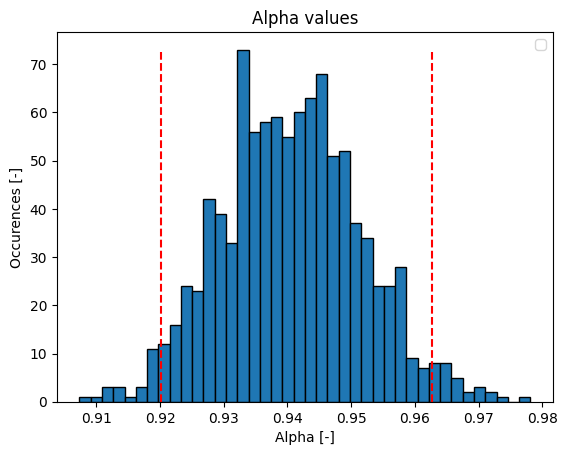

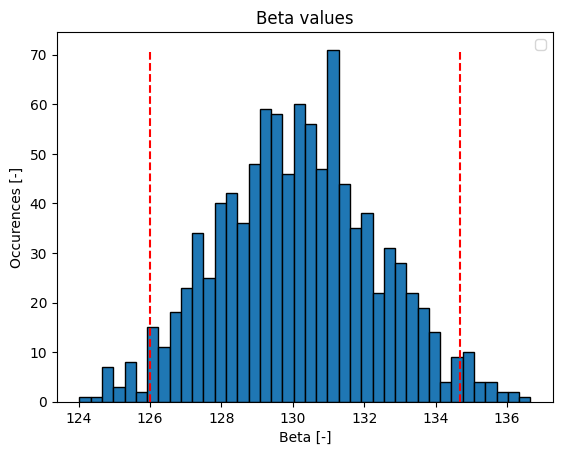

In [38]:
# FAIRE 1000 échantillons de 6000 (100,600 pour compiler vite)

#bootstrap algo
result = np.zeros((2,1000))
for i in range (1000):
    sample = np.random.choice(valid_beijing_winter[target_column], 6000, replace=True )
    prediction = st.gamma.fit(sample,floc=0)
    result[0,i]= prediction[0]
    result[1,i]= prediction[2]

mean_param = result.mean(1)
print(mean_param)

#confidence interval
alpha_lower = np.percentile(result[0], 2.5)
alpha_upper = np.percentile(result[0], 97.5)
beta_lower = np.percentile(result[1], 2.5)
beta_upper = np.percentile(result[1], 97.5)

#histograms 

#alpha param
alphabins = 40 #[0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1,1.05]
a_Occ, a_bins, a_garbage = plt.hist(result[0],bins=alphabins, density=False,edgecolor='black')
a_Max = max(a_Occ)

plt.vlines(alpha_lower,0,a_Max,linestyles='dashed',color ='red')
plt.vlines(alpha_upper,0,a_Max,linestyles='dashed',color ='red')
plt.title('Alpha estimations from bootstrap process')
plt.xlabel('Alpha [-]')
plt.ylabel('Occurences [-]')
plt.legend()
plt.show()

#scale param
betabins = 40 #[80,90,100,110,120,130,140,150,160,170,180,190,200]
b_Occ, b_bins, b_garbage = plt.hist(result[1],bins=betabins, density=False, edgecolor='black')
b_Max = max(b_Occ)

plt.vlines(beta_lower,0,b_Max,linestyles='dashed',color ='red')
plt.vlines(beta_upper,0,b_Max,linestyles='dashed',color ='red')
plt.title('Betaestimations from bootstrap process')
plt.xlabel('Beta [-]')
plt.ylabel('Occurences [-]')
#plt.legend()
plt.show()


    

In [39]:
#def stat_func(data):
#   return st.gamma.fit(data)[:1]

#data = (valid_beijing_winter,)  # samples must be in a sequence

#res = bootstrap(data,stat_func,n_resamples=1000,size=6000,vectorized=False)
#fig, ax = plt.subplots()
#ax.hist(res.bootstrap_distribution, bins=25)
#ax.set_title('Bootstrap Distribution')
#ax.set_xlabel('statistic value')
#ax.set_ylabel('frequency')
#plt.show()

Comments here:

In both cases, the histograms are fairly centered around specific values, indicating that the MLE estimator consistently produces similar results across different bootstrap samples, suggesting reasonably good accuracy.

Additionally, since the distribution is relatively narrow, the MLE estimates appear to be quite precise.

The confidence intervals also capture the central values in both histograms, implying that there is low uncertainty surrounding the estimated parameters.

However, there is a noticeable skewness in the results, with the higher estimates leaning toward the right, which suggests a potential bias in the estimates toward higher values.

# TODO : AJUSTER POUR LES NOUVEAUX GRAPHES  

## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [40]:
# Emissions des ambassades US ) Beijing, en Hiver
# Régression à raison de DEWP, TEMP, HUMI, PRES, cbwd, Iws, precipitation comme paramètres.

target_list = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'Iws', 'precipitation']

regress_beijing = valid_beijing_winter[~pd.isna(beijing_df['DEWP']) 
                                & ~pd.isna(beijing_df['HUMI'])
                                & ~pd.isna(beijing_df['PRES'])
                                & ~pd.isna(beijing_df['TEMP'])
                                & ~pd.isna(beijing_df['cbwd'])
                                & ~pd.isna(beijing_df['Iws'])
                                & ~pd.isna(beijing_df['precipitation'])]
dummied_regress_beijing = pd.get_dummies(regress_beijing, prefix='cbwd', columns=['cbwd'], drop_first=True, dtype=int)


X = dummied_regress_beijing[target_list]
X = sm.add_constant(X)
Y = dummied_regress_beijing['PM_US Post']
regress_model = sm.OLS(Y,X)
regress_result = regress_model.fit()

print(regress_result.summary())

#plt.scatter(regress_beijing['DEWP'],regress_beijing['PM_US Post'])
#plt.show()


8357
8189
                            OLS Regression Results                            
Dep. Variable:             PM_US Post   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     811.1
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:31:57   Log-Likelihood:                -48546.
No. Observations:                8189   AIC:                         9.711e+04
Df Residuals:                    8179   BIC:                         9.718e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2491.1764    205.460 

C:\Users\roeke\AppData\Local\Temp\ipykernel_5748\897998552.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  regress_beijing = valid_beijing_winter[~pd.isna(beijing_df['DEWP'])


Comments here:

We firstly notice that the R² value returned by OSL is about 0.472, which tells us that the linear regression has low accuray. We infer that there exists a linear dependency, but also that there are certainly non-linear dependencies over the different factors (pression, humidity, temperature, wind), or even dependencies from different phenomenon not taken into account for the concentration of PM2.5 in Beinjing, during winter.

In addition, we observe a F-stat probability critically close to 0. This means that the independant variable (the "const" terme) is not likely to be different from 0 in our model by chance. The hypothesis that the constant term should in fact be equal to zero is strongly rejected. This conclusion is reinforced by the fact that the value  of our constant coefficient, 2491.18 +- 205.46, is really far from zero. 

Moreover, the p-value from t-test reported by OLS gives us a great information on the significance of parameters in the model.
As the null hypothesis of this t-test is that the parameter is non-significant in the model, and the alternate hypothesis is that the parameter is significant, we can conclude that most of the parameters are significant (with a p-value close to 0), but the parameter "DEWP" seems irrelated with a p-value higher than 66%. The presence of at least one irrelevant parameter is indeed confirmed by a lower value for the adj. R² than for the standard R² (the adj. R² is a tweaked computation of R², that penalizes the presence of such irrelated variables).

Finally, the summary highlights a major impact on the PM 2.5 concentration for precipitation and wind. A high level of rain seems to decrease the pollution measured, while the wind direction can spread PM2.5 out or lead to higher concentration levels.


------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [41]:
# à voir semaine 5
auto_valid_beijing = beijing_df[(beijing_df['year'] < 2016) & (beijing_df['year'] > 2011)]

#~pd.isna(beijing_df[target_column]) 
training_df = pd.DataFrame()

training_df['Y'] = auto_valid_beijing[target_column]
training_df['Xt-1'] = auto_valid_beijing[target_column].shift(1)
training_df['Xt-2'] = auto_valid_beijing[target_column].shift(2)
training_df['Xt-3'] = auto_valid_beijing[target_column].shift(3)

training_df = training_df[~pd.isna(training_df['Y'])
                          & ~pd.isna(training_df['Xt-1'])
                          & ~pd.isna(training_df['Xt-2'])
                          &~pd.isna(training_df['Xt-3'])]

training_matrix = training_df[['Xt-1','Xt-2','Xt-3']].to_numpy()

training_set = training_matrix[:3 * len(training_matrix)//4]
validation_set = training_matrix[3 * len(training_matrix)//4:]

X_auto = training_set
Y_auto = training_df['Y'].to_numpy()[:len(training_set)]

print(len(training_set), len(Y_auto))

regress_model = sm.OLS(Y_auto,X_auto)
regress_result = regress_model.fit()

print(regress_result.summary())
print(regress_result.params)

25341 25341
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          2.771e+05
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                        0.00
Time:                        20:58:45   Log-Likelihood:                     -1.1531e+05
No. Observations:               25341   AIC:                                  2.306e+05
Df Residuals:                   25338   BIC:                                  2.307e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

Comments here:
We observe a value of R² close to 1, which indicates that our model has good accuracy.
Moreover, we notice as expected that the influence of a day in the prediction decreases the more that day is distant in time. Once more, as expected each day is strongly relevant in the computation of the prediction. The t-test indeed shows a p-value of almost 0%, which indicates that we reject for each day the hypothesis that this day is irrelevant in the prediction process.   

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

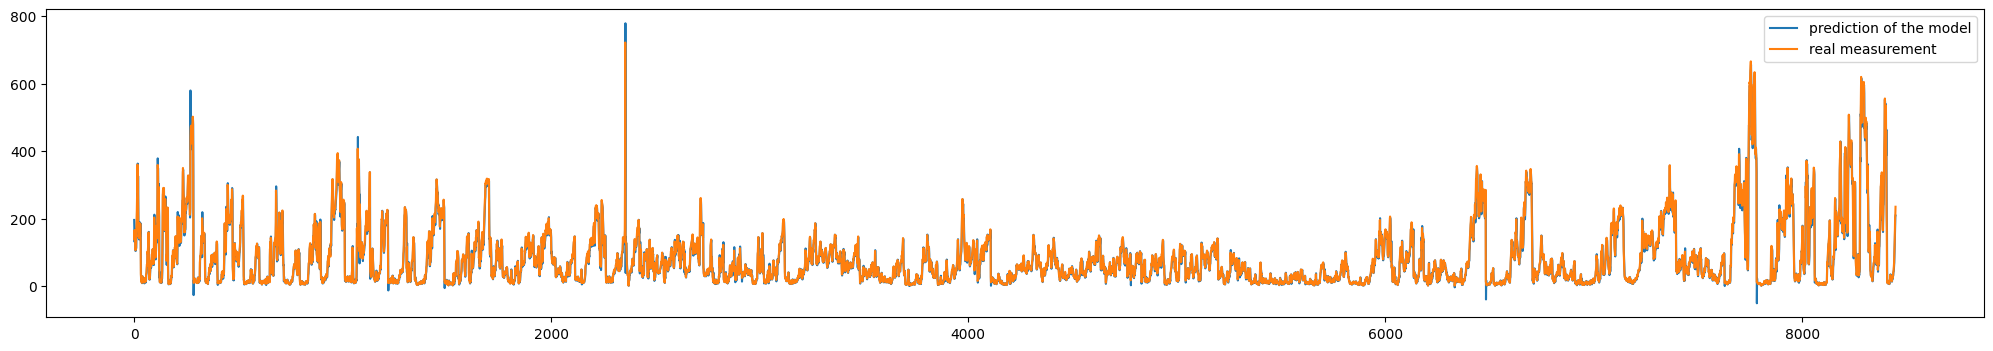

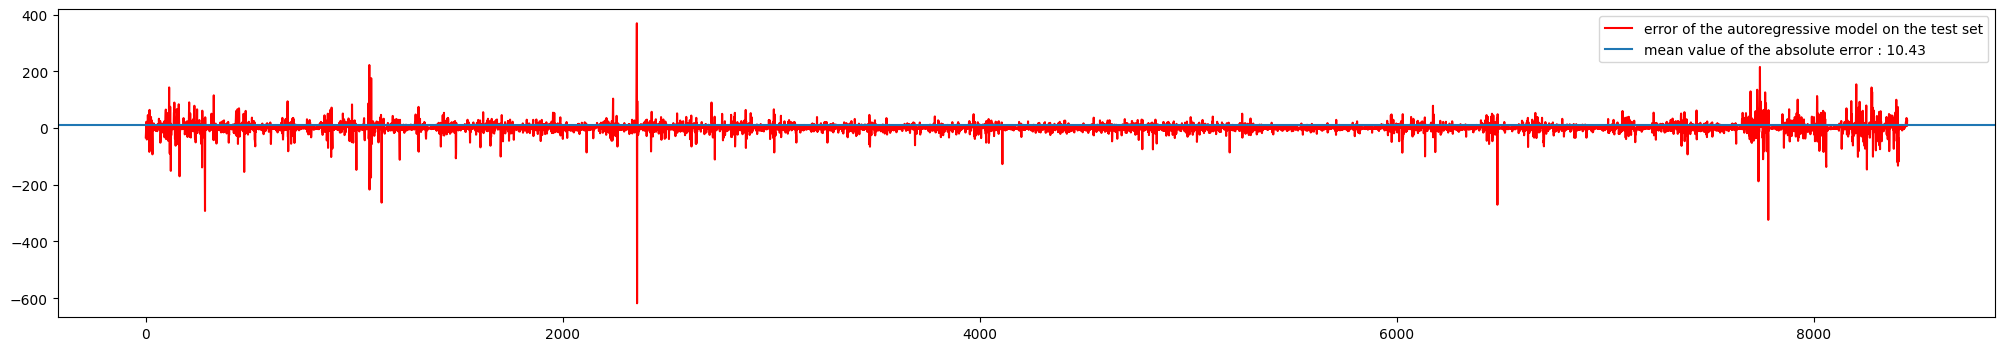

Mean value of the absolute error for the test set :  10.433568323991619
Mean value of the absolute error for the training set :  12.176182346429684


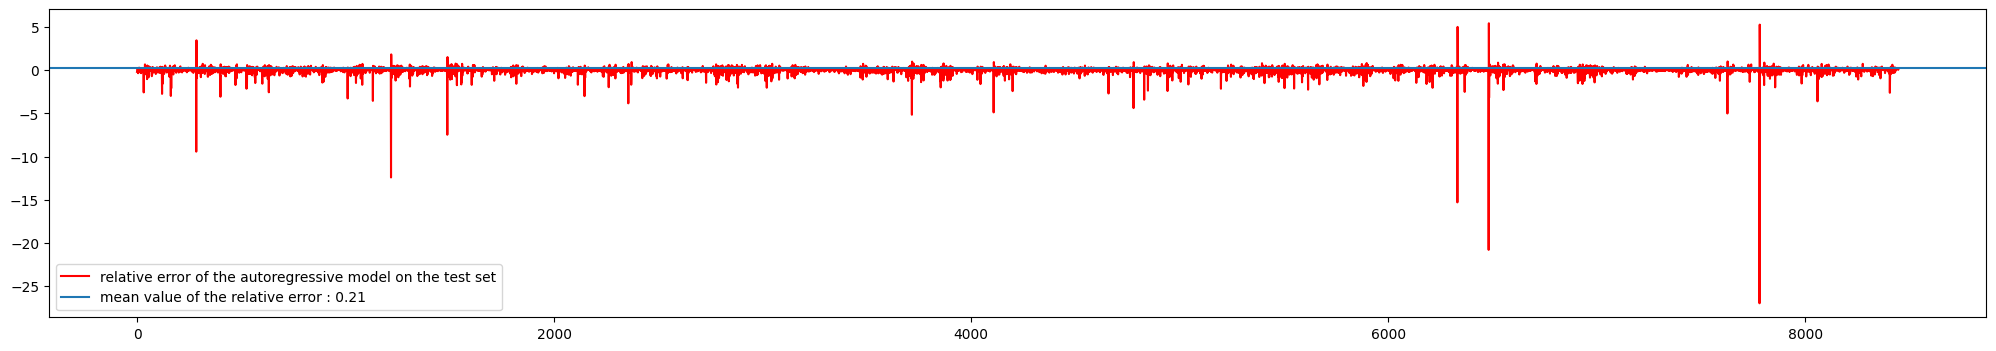

Mean value of the relative error for the test set :  0.20587050317427028
Mean value of the relative error for the training set :  0.20056568981286615


In [37]:
plt.figure(figsize=(25,4))
X_test = validation_set
Y_test_real = training_df['Y'].to_numpy()[len(training_set):]

Y_test_predicted = X_test@regress_result.params



plt.plot(np.arange(0,len(Y_test_real)), Y_test_predicted, label='prediction of the model')
plt.plot(np.arange(0,len(Y_test_real)),Y_test_real, label='real measurement')
plt.legend()
plt.show()

Y_test_abs_error = (Y_test_real - Y_test_predicted)
plt.figure(figsize=(25,4))
plt.plot(np.arange(0,len(Y_test_real)),Y_test_abs_error,color='red', label='error of the autoregressive model on the test set')
plt.axhline(np.mean(abs(Y_test_abs_error)), label= "mean value of the absolute error : {0:.2f}".format(np.mean(abs(Y_test_abs_error))))
plt.legend()
plt.show()

print("Mean value of the absolute error for the test set : ", np.mean(abs(Y_test_abs_error)))
print("Mean value of the absolute error for the training set : ", np.mean(abs((Y_auto - X_auto@regress_result.params))))


Y_test_error = (Y_test_real - Y_test_predicted)/Y_test_real
plt.figure(figsize=(25,4))
plt.plot(np.arange(0,len(Y_test_real)),Y_test_error,color='red', label='relative error of the autoregressive model on the test set')
plt.axhline(np.mean(abs(Y_test_error)), label= "mean value of the relative error : {0:.2f}".format(np.mean(abs(Y_test_error))))
plt.legend()
plt.show()

print("Mean value of the relative error for the test set : ", np.mean(abs(Y_test_error)))
print("Mean value of the relative error for the training set : ", np.mean(abs((Y_auto - X_auto@regress_result.params)/Y_auto)))


Comments here:


## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

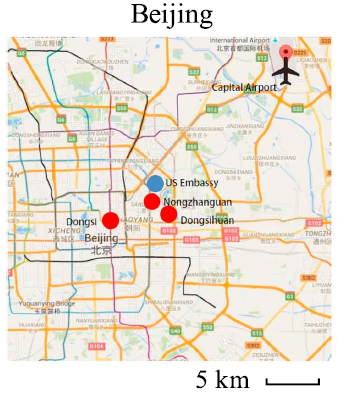


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [16]:
#Load les csv en dataframe
beijing_df = pd.read_csv('BeijingPM.csv')

#Définir la colonne qu'on analyse
beijing_column = 'PM_US Post'
nongz_column = 'PM_Nongzhanguan'
year = 'year'

#Filtrer les dataframe de façon à ne garder que les entrées où on a une valeur pour Nongzhanguan et Beijing
new_valid_beijing = beijing_df[~pd.isna(beijing_df[nongz_column]) & ~pd.isna(beijing_df[beijing_column]) & (beijing_df[year] > 2011) & (beijing_df[year] < 2016)]

#Filtrer les dataframe "communs" en saison summer et winter
new_valid_beijing_winter = valid_beijing[valid_beijing["season"] == 4]


b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [17]:
# Code here


Comment here:


c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [18]:
# Code here


Comment here:

